<a href="https://colab.research.google.com/github/mw2304/FreeformProgramming/blob/main/FreeFormProgrammingipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# using multiple csv files, so will need to merge them all for clarity and analysis.

import pandas as pd

quali = pd.read_csv('Formula1_2025Season_QualifyingResults.csv')
squali= pd.read_csv('Formula1_2025Season_SprintQualifyingResults.csv')
race = pd.read_csv('Formula1_2025Season_RaceResults.csv')
srace= pd.read_csv('Formula1_2025Season_SprintResults.csv')


In [2]:
#merge the data sets

f12025 = pd.merge(quali, race, on=["Driver", "Track"], suffixes=("_quali", "_race"))
f12025sprint = pd.merge(squali, srace, on=["Driver", "Track"], suffixes=("_squali", "_srace"))
#rename Team_quali
#rename team duplicates (differences in capitalisation spelling error etc)
f12025 = f12025.rename(columns={'Team_quali': 'Team'})
f12025['Team']=f12025['Team'].replace({'Red Bull Racing honda RBPT':'Red Bull Racing Honda RBPT','Racing Bulls honda RBPT': 'Racing Bulls Honda RBPT', 'Racing Honda RBPT':'Racing Bulls Honda RBPT', 'Racing bulls Honda RBPT': 'Racing Bulls Honda RBPT' })
display(f12025)
#display(f12025sprint)

#keeping datasets separate for 'cleanliness', focussing on just grand prix rather than sprint races
#changing




,Track,Position_quali,No_quali,Driver,Team,Q1,Q2,Q3,Laps_quali,Position_race,No_race,Team_race,Starting Grid,Laps_race,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
0,Australia,1,4,Lando Norris,McLaren Mercedes,1:15.912,1:15.415,1:15.096,20,1,4,McLaren Mercedes,1,57,1:42:06.304,25,Yes,1:22.167
1,Australia,2,81,Oscar Piastri,McLaren Mercedes,1:16.062,1:15.468,1:15.180,18,9,81,McLaren Mercedes,2,57,+20.448,2,No,1:23.242
2,Australia,3,1,Max Verstappen,Red Bull Racing Honda RBPT,1:16.018,1:15.565,1:15.481,17,2,1,Red Bull Racing Honda RBPT,3,57,+0.895,18,No,1:23.081
3,Australia,4,63,George Russell,Mercedes,1:15.971,1:15.798,1:15.546,21,3,63,Mercedes,4,57,+8.481,15,No,1:25.065
4,Australia,5,22,Yuki Tsunoda,Racing Bulls Honda RBPT,1:16.225,1:16.009,1:15.670,18,12,22,Racing Bulls Honda RBPT,5,57,+29.884,0,No,1:24.194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,Abu Dhabi,16,44,Lewis Hamilton,Ferrari,1:23.394,NaN,NaN,9,8,44,Ferrari,16,58,+72.670,4,No,1:28.094
474,Abu Dhabi,17,23,Alexander Albon,Williams Mercedes,1:23.416,NaN,NaN,6,16,23,Williams Mercedes,17,58,+90.327,0,No,1:28.367
475,Abu Dhabi,18,27,Nico Hulkenberg,Kick Sauber Ferrari,1:23.450,NaN,NaN,9,9,27,Kick Sauber Ferrari,18,58,+79.014,2,No,1:27.050
476,Abu Dhabi,19,10,Pierre Gasly,Alpine Renault,1:23.468,NaN,NaN,9,19,10,Alpine Renault,19,57,+1 lap,0,No,1:27.767


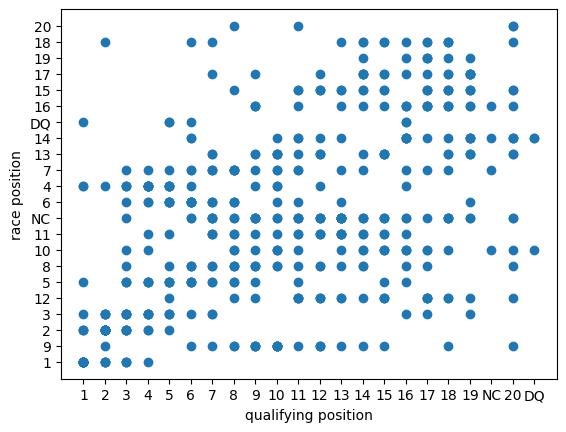

<Figure size 640x480 with 0 Axes>

In [3]:
#1. quali position vs race position

import matplotlib.pyplot as plt
import numpy as np



plt.scatter(f12025['Position_quali'], f12025['Position_race'])
plt.xlabel('qualifying position')
plt.ylabel('race position')
plt.figure()
plt.show()


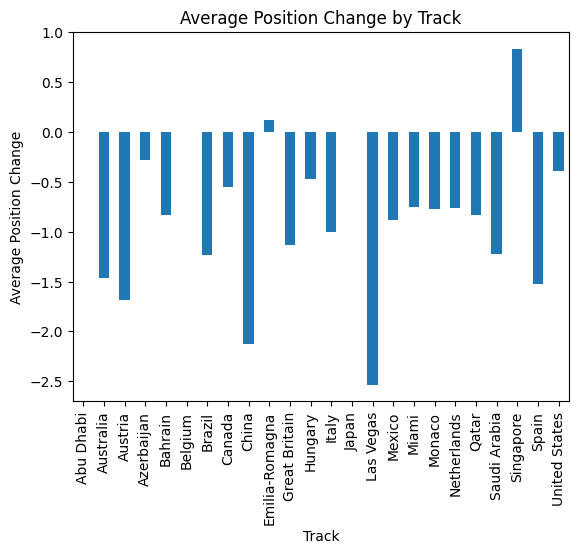

In [4]:
# 2. position changed per circuit

#only include numerical data
f12025['Position_qualifin']= pd.to_numeric(f12025['Position_quali'], errors='coerce')
f12025['Position_racefin']= pd.to_numeric(f12025['Position_race'], errors='coerce')

#creating column for position change
poschange = f12025['Position_racefin'] - f12025['Position_qualifin']
f12025['Position_change'] = poschange

#average by track
#where - is finishing better than qualifying, + is finshing lower down than qualifying
poschange_by_track = f12025.groupby('Track')['Position_change'].mean()
#print(poschange_by_track)

#bar plot
poschange_by_track.plot(kind='bar')
plt.xlabel('Track')
plt.ylabel('Average Position Change')
plt.title('Average Position Change by Track')
plt.show()

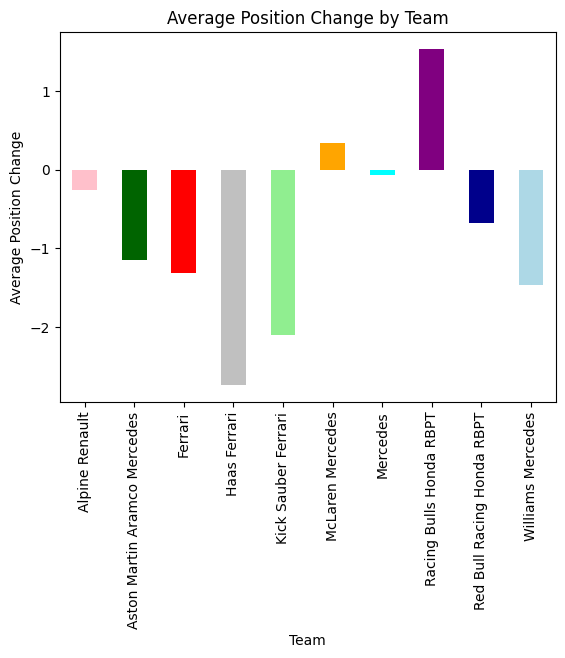

In [5]:
#3. sort by team instead of track
poschange_by_team = f12025.groupby('Team')['Position_change'].mean()

team_colors = {'Red Bull Racing Honda RBPT': 'darkblue', 'Racing Bulls Honda RBPT': 'purple', 'Mercedes' :'cyan', 'McLaren Mercedes': 'orange', 'Ferrari': 'red', 'Williams Mercedes': 'lightblue', 'Haas Ferrari': 'silver', 'Aston Martin Aramco Mercedes':'darkgreen', 'Kick Sauber Ferrari': 'lightgreen', 'Alpine Renault': 'pink'}
colors = [team_colors[team] for team in poschange_by_team.index]
#bar plot
poschange_by_team.plot(kind='bar', color=colors)
plt.xlabel('Team')
plt.ylabel('Average Position Change')
plt.title('Average Position Change by Team')
plt.show()
#- means making up a place (e.g 4th to 3rd), + losing a place (3rd to 4th)

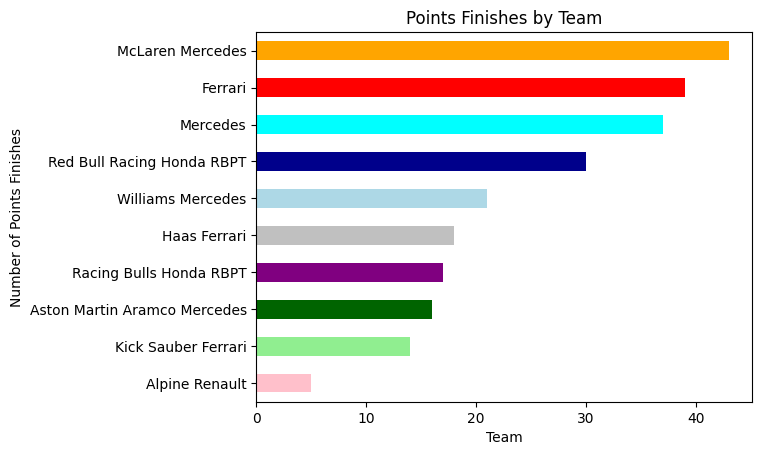

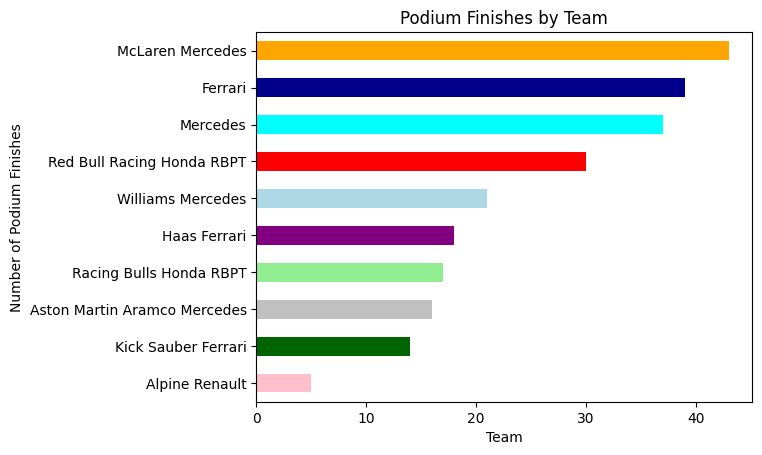

In [7]:
#4. number of point/podium finishes per team

f12025['pointsfinish'] = f12025['Points'] > 0


points_finishesbyteam = (f12025.groupby('Team')['pointsfinish'].sum().sort_values())
team_colors = {'Red Bull Racing Honda RBPT': 'darkblue', 'Racing Bulls Honda RBPT': 'purple', 'Mercedes' :'cyan', 'McLaren Mercedes': 'orange', 'Ferrari': 'red', 'Williams Mercedes': 'lightblue', 'Haas Ferrari': 'silver', 'Aston Martin Aramco Mercedes':'darkgreen', 'Kick Sauber Ferrari': 'lightgreen', 'Alpine Renault': 'pink'}
colors = [team_colors[team] for team in points_finishesbyteam.index]
points_finishesbyteam.plot(kind='barh', color=colors)
plt.title('Points Finishes by Team')
plt.xlabel('Team')
plt.ylabel('Number of Points Finishes')
plt.show()



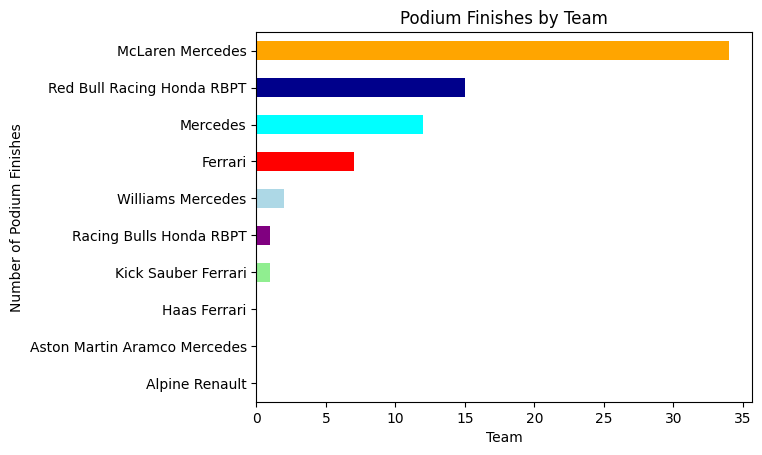

In [10]:
#podium finishes per team

f12025['podiumfinish'] = f12025['Points'] > 14 #15,18,25 awarded for podium

podium_finishesbyteam = (f12025.groupby('Team')['podiumfinish'].sum().sort_values())
team_colors = {'Red Bull Racing Honda RBPT': 'darkblue', 'Racing Bulls Honda RBPT': 'purple', 'Mercedes' :'cyan', 'McLaren Mercedes': 'orange', 'Ferrari': 'red', 'Williams Mercedes': 'lightblue', 'Haas Ferrari': 'silver', 'Aston Martin Aramco Mercedes':'darkgreen', 'Kick Sauber Ferrari': 'lightgreen', 'Alpine Renault': 'pink'}
colors = [team_colors[team] for team in podium_finishesbyteam.index]
podium_finishesbyteam.plot(kind='barh', color=colors)
plt.title('Podium Finishes by Team')
plt.xlabel('Team')
plt.ylabel('Number of Podium Finishes')
plt.show()
